<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Lab-Contraste_Image/Correction_contraste_image-Colab.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Droits d'auteur, sources et inspiration:

Sources: 
<ul>
    <ul>
        <li><a href="http://morpheo.inrialpes.fr/people/Boyer/Teaching/L3/L3_analyse.pdf" target='_blank'>Analyse d'images - introduction</a> - Elise Arnaud - Edmond Boyer - Université Joseph Fourier</li>
        <li><a href="https://fr.wikipedia.org/wiki/Histogramme_(imagerie_num%C3%A9rique)" target='_blank'>Histogramme (imagerie numérique)</a> - Wikipédia</li>
        <li><a href="https://scikit-image.org/docs/0.18.x/auto_examples/color_exposure/plot_local_equalize.html#sphx-glr-auto-examples-color-exposure-plot-local-equalize-py" target='_blank'>Histogram Equalization</a> - tutoriel scikit-image</li>
    </ul>
</ul>


# Égalisation d’un histogramme : transformation des niveaux de gris dans le but d'améliorer le contraste d'une image

Cet exemple améliore une image à faible contraste, à l'aide de méthodes appelée égalisation d'histogramme, qui permet de mieux répartir les valeurs d'intensité les plus fréquentes dans une image. L'égalisation est intéressante pour les images dont la totalité, ou seulement une partie, est de faible contraste. Ces techniques sont utilisées pour la retouche de photographies. 

### Égalisation globale d'un histogramme

L'égalisation globale de l'histogramme cherche à représenter chaque niveau de gris d'une image par un nombre égal de pixels. Par exemple, soit une image de 128 par 128 pixels qui comporte donc 16 384 pixels et 64 niveaux de gris. L'algorithme d'égalisation global de l'histogramme cherchera à obtenir 16384/64 = 256 pixels par niveau de gris.    

### Égalisation locale d'un histogramme 

L'égalisation locale d'histogramme met l'accent sur les variations locales du niveau de gris. L'égalisation locale d'histogramme répartit les valeurs d'intensité les plus fréquentes dans une image. L'image égalisée a une fonction de distribution cumulative à peu près linéaire pour chaque voisinage de pixels.

L’histogramme cumulé $h_c(x) = \sum_{z\le x} h_n(z)$ doit être le plus linéaire possible

In [3]:
!pip3 install -U scikit-image
!pip3 install -U matplotlib
print("Attention! Vous devez redémarrer l'exécution du carnet IPython")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Attention! Vous devez redémarrer l'exécution du carnet IPython


/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


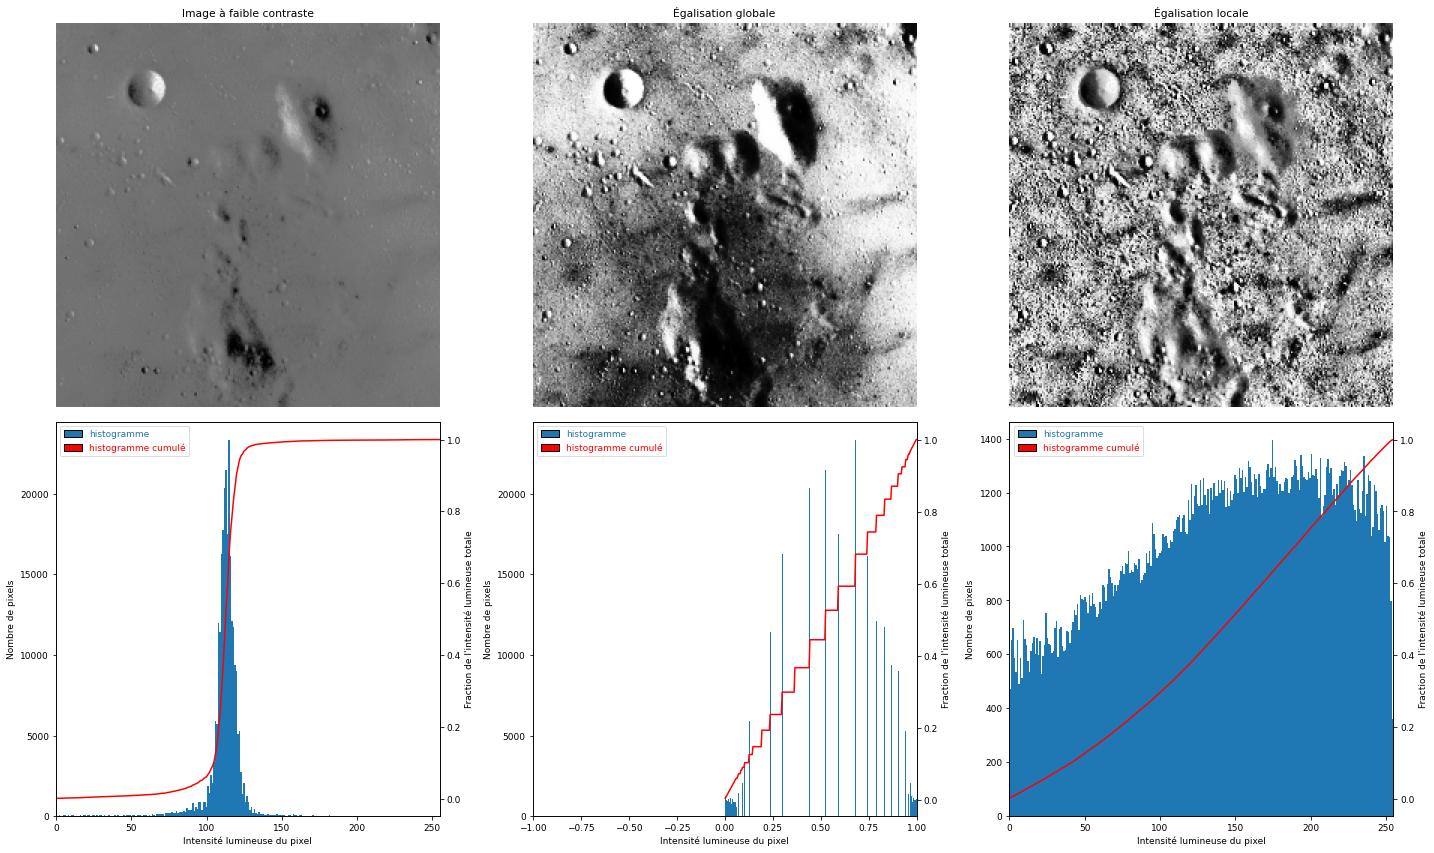

In [1]:
# Source: https://scikit-image.org/docs/0.18.x/auto_examples/color_exposure/plot_local_equalize.html#sphx-glr-auto-examples-color-exposure-plot-local-equalize-py

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.morphology import ball
from skimage.filters import rank

matplotlib.rcParams['font.size'] = 9
from matplotlib.patches import Rectangle

def plot_img_and_hist(image, axes, bins=256):
    """Afficher une image accompagnée de son histogramme d'intensité lumineuse 
       et de son histogramme d'intensité lumineuse cumulé.
    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Afficher l'image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Afficher l'histogramme
    ax_hist.hist(image.ravel(), bins=bins, label=["histogramme"])
    ax_hist.ticklabel_format(axis='y')
    ax_hist.set_xlabel('Intensité lumineuse du pixel')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Afficher l'histogramme cumulé
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

# Lecture d'une image à faible contraste
img = img_as_ubyte(data.moon())

# Égalisation globale
img_rescale = exposure.equalize_hist(img)

# Égalisation locale
selem = disk(30)
img_eq = rank.equalize(img, selem=selem)

# Afficher les résultats
fig = plt.figure(figsize=(20, 12))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

# Créer la légende des histogrammes
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [None,'r']]
labels= ["histogramme","histogramme cumulé"]

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Image à faible contraste')
ax_hist.set_ylabel('Nombre de pixels')
ax_cdf.set_ylabel("Fraction de l'intensité lumineuse totale")
plt.legend(handles,labels,labelcolor=['#1F77B4','r'], framealpha=0.7, loc='upper left')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Égalisation globale')
ax_hist.set_ylabel('Nombre de pixels')
ax_cdf.set_ylabel("Fraction de l'intensité lumineuse totale")
plt.legend(handles,labels,labelcolor=['#1F77B4','r'], framealpha=0.7, loc='upper left')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Égalisation locale')
ax_hist.set_ylabel('Nombre de pixels')
ax_cdf.set_ylabel("Fraction de l'intensité lumineuse totale")
plt.legend(handles,labels,labelcolor=['#1F77B4','r'], framealpha=0.7, loc='upper left')

# Prévenir la superposition des étiquettes pour l'axe des y
fig.tight_layout()